In [69]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D
from tensorflow.keras.layers import Activation,Dropout,Flatten
from tensorflow.keras import backend as k

In [70]:
#converting all image into same size
img_width,img_height = 224,224

In [71]:
train_data_dir = "v_data/train"
test_data_dir = "v_data/test"

In [52]:
#we will train 400 data
n_train = 400
# testing 100 data
n_val = 100
epochs = 5
#breaking the data into different batches and training each batch seperately
batch_size = 16

In [53]:
# if it is taking dimension first then
if k.image_data_format() == 'channel_first':
    input_shape = (3,img_width,img_height)
# 3 stands for coloured image
else:
    input_shape = (img_width,img_height,3)


### Modelling

In [54]:
# Input CNN layer
model = Sequential()
model.add(Conv2D(32, (2,2), input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# 1st CNN layer
model.add(Conv2D(32, (2,2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#2nd CNN layer
model.add(Conv2D(64, (2,2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# output needs to be flattened
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [55]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [56]:
# now feed data to the model
#to get data from external folder, we use image data generator

train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

In [57]:
# Train data
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width,img_height),
        batch_size = batch_size,
        class_mode='binary'
    )

Found 400 images belonging to 2 classes.


In [58]:
#Test data
val_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width,img_height),
        batch_size = batch_size,
        class_mode ='binary'
    )

Found 100 images belonging to 2 classes.


In [59]:
# since the images are comming through generator so we need to specify the generator and its parameters
model.fit_generator(
    train_generator,
    steps_per_epoch=n_train // batch_size,
    epochs = epochs,
    validation_data = val_generator,
    validation_steps = n_val // batch_size
    )

Epoch 1/5


C:\Users\Ananaya Gupta\AppData\Local\Temp\ipykernel_16020\2100583445.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


25/25 [==============================] - 15s 543ms/step - loss: 22.3925 - accuracy: 0.6400 - val_loss: 1.0106 - val_accuracy: 0.6979
Epoch 2/5
25/25 [==============================] - 13s 501ms/step - loss: 0.5547 - accuracy: 0.7625 - val_loss: 0.4958 - val_accuracy: 0.6979
Epoch 3/5
25/25 [==============================] - 13s 500ms/step - loss: 0.4404 - accuracy: 0.7300 - val_loss: 0.2735 - val_accuracy: 0.8958
Epoch 4/5
25/25 [==============================] - 12s 490ms/step - loss: 0.3967 - accuracy: 0.8100 - val_loss: 0.3104 - val_accuracy: 0.8854
Epoch 5/5
25/25 [==============================] - 14s 556ms/step - loss: 0.2483 - accuracy: 0.8650 - val_loss: 0.2766 - val_accuracy: 0.8958


#### Image selection and processing

In [60]:
from tensorflow.keras.preprocessing.image import load_img

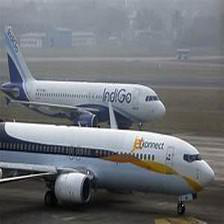

In [61]:
img = load_img('v_data/test/planes/21.jpg',target_size=(224,224))
img

In [62]:
import numpy as np
img_array = np.array(img)
img_array[0:5]

array([[[163, 167, 178],
        [163, 167, 178],
        [162, 166, 177],
        ...,
        [133, 134, 139],
        [131, 132, 137],
        [130, 131, 136]],

       [[160, 164, 175],
        [160, 164, 175],
        [159, 163, 174],
        ...,
        [132, 133, 138],
        [130, 131, 136],
        [129, 130, 135]],

       [[157, 161, 172],
        [157, 161, 172],
        [156, 160, 171],
        ...,
        [131, 132, 137],
        [129, 130, 135],
        [129, 130, 135]],

       [[156, 160, 171],
        [156, 160, 171],
        [155, 159, 170],
        ...,
        [130, 131, 136],
        [128, 129, 134],
        [127, 128, 133]],

       [[156, 160, 171],
        [156, 160, 171],
        [155, 159, 170],
        ...,
        [129, 130, 135],
        [127, 128, 133],
        [126, 127, 132]]], dtype=uint8)

In [63]:
img_array = img_array.reshape(1,224,224,3)

In [64]:
img_array

array([[[[163, 167, 178],
         [163, 167, 178],
         [162, 166, 177],
         ...,
         [133, 134, 139],
         [131, 132, 137],
         [130, 131, 136]],

        [[160, 164, 175],
         [160, 164, 175],
         [159, 163, 174],
         ...,
         [132, 133, 138],
         [130, 131, 136],
         [129, 130, 135]],

        [[157, 161, 172],
         [157, 161, 172],
         [156, 160, 171],
         ...,
         [131, 132, 137],
         [129, 130, 135],
         [129, 130, 135]],

        ...,

        [[ 51,  50,  48],
         [ 45,  44,  42],
         [ 43,  42,  40],
         ...,
         [ 57,  52,  48],
         [ 59,  54,  50],
         [ 60,  55,  51]],

        [[ 53,  52,  50],
         [ 48,  47,  45],
         [ 46,  45,  43],
         ...,
         [ 61,  56,  52],
         [ 62,  57,  53],
         [ 64,  59,  55]],

        [[ 55,  54,  52],
         [ 49,  48,  46],
         [ 47,  46,  44],
         ...,
         [ 65,  60,  56],
        

In [65]:
labels = model.predict(img_array)
labels[0][0]

1/1 [==============================] - 0s 154ms/step


0.9217182

In [66]:
if labels[0][0]>=0.5:
    print('planes')
else:
    print('cars')

planes


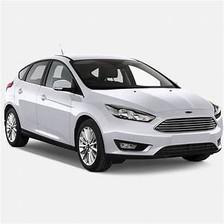

In [67]:
img = load_img('v_data/train/cars/189.jpg',target_size=(224,224))
img

In [68]:
from tensorflow.keras.preprocessing.image import load_img
img2 = load_img('v_data/train/cars/182.jpg',target_size=(224,224))
img2
img_array2 = np.array(img2)
img_array2 = img_array2.reshape(1,224,224,3)
labels = model.predict(img_array2)
print(labels)
if labels[0][0]>=0.5:
    print('planes')
else:
    print('cars')

1/1 [==============================] - 0s 44ms/step
[[0.00875683]]
cars
